## Classifying music genres from spotify 
### This project was done to learn how to pull data from spotify API, I've done another music classifier using GTZan dataset but I'll make this one a bit different so let's go...
### NOTE: check the .py files in the repo for the API interaction codes


### As usual  importing libraries

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import uniform,truncnorm, randint
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,roc_auc_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
from sklearn.neural_network import MLPClassifier
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

#### I have created a csv file for each of the 3 genres pop,rock and country.. 

In [14]:
df_pop=pd.read_csv('pop_spotify.csv')
df_rock=pd.read_csv('rock_spotify.csv')
df_cn=pd.read_csv('country_spotify.csv')

In [15]:
df_pop.head()

,id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,5jrdCoLpJSvHHorevXBATy,0.585,0.165,131.931,0.0513,0.00314,0.000000,4,0.645,6,215672,-6.122,0.353,1
1,3s4U7OHV7gnj42VV72eSZ6,0.586,0.193,120.970,0.0377,0.16200,0.000002,4,0.799,11,227833,-6.735,0.549,1
2,3cHyrEgdyYRjgJKSOiOtcS,0.963,0.139,129.992,0.0981,0.02950,0.000000,4,0.581,11,204160,-4.087,0.788,1
3,1fh2TfUOtOoXEE8qQynYEC,0.712,0.119,122.014,0.0381,0.06490,0.000000,4,0.663,1,257280,-4.945,0.480,0
4,27jdUE1EYDSXZqhjuNxLem,0.483,0.106,93.458,0.0403,0.02620,0.616000,4,0.738,6,285014,-8.915,0.355,0


In [16]:
df_rock.head()

,id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,1hKdDCpiI9mqz1jVHRKG0E,0.824,0.0590,123.331,0.0300,0.00206,0.009030,4,0.579,6,331573,-8.710,0.635,0
1,60a0Rd6pjrkxjPbaKzXjfq,0.864,0.2090,105.143,0.0584,0.00958,0.000000,4,0.556,3,216880,-5.870,0.400,0
2,6NaBDHz9C7Uz9Z9CwLXQin,0.754,0.1030,169.373,0.0732,0.01950,0.000001,4,0.299,5,221053,-4.078,0.295,0
3,49h0RYK3yzWkfbVyNJjJ01,0.574,0.1200,84.984,0.0372,0.35000,0.000100,4,0.535,2,273424,-6.865,0.445,0
4,7ueP5u2qkdZbIPN2YA6LR0,0.436,0.0964,119.051,0.0558,0.44100,0.615000,4,0.826,1,259093,-9.583,0.272,1


In [17]:
df_cn.head()

,id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,6DEaND0SHv3sC11xobZLiy,0.719,0.2120,158.031,0.0419,0.1010,0.000000,4,0.558,11,243707,-5.603,0.483,1
1,6YWvgL06rVQ1TLzbT5EQLB,0.737,0.3250,92.983,0.0434,0.2230,0.000000,4,0.670,9,182400,-6.794,0.754,1
2,6WTFRjOG3nS94P8wfm4ANH,0.889,0.1050,158.023,0.1060,0.2180,0.000000,4,0.514,8,176293,-3.396,0.843,0
3,5gnV9rhNQlb6nqFiwQgKVf,0.849,0.0971,105.012,0.0316,0.0279,0.000169,4,0.720,6,205720,-2.246,0.956,1
4,1yaFBgYRHxXxJN0AKy3WS1,0.724,0.0684,101.997,0.0230,0.0196,0.043300,4,0.684,4,230360,-6.255,0.849,1


### scaling the data

In [18]:
col_names=df_pop.drop(['id','time_signature'],axis=1).columns

In [19]:
sc=MinMaxScaler()
df_pop=pd.DataFrame(sc.fit_transform(df_pop.drop(['id','time_signature'],axis=1)),columns=col_names)
df_rock=pd.DataFrame(sc.fit_transform(df_rock.drop(['id','time_signature'],axis=1)),columns=col_names)
df_cn=pd.DataFrame(sc.fit_transform(df_cn.drop(['id','time_signature'],axis=1)),columns=col_names)

In [20]:
df_rock.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode
0,0.807018,0.036927,0.371249,0.016393,0.003139,0.014683,0.623476,0.545455,0.762890,0.618714,0.653905,0.0
1,0.853801,0.196552,0.199619,0.093989,0.014673,0.000000,0.588415,0.272727,0.308149,0.777934,0.375370,0.0
2,0.725146,0.083750,0.805722,0.134426,0.029888,0.000002,0.196646,0.454545,0.324694,0.878399,0.250919,0.0
3,0.514620,0.101841,0.009389,0.036066,0.536800,0.000162,0.556402,0.181818,0.532337,0.722151,0.428707,0.0
4,0.353216,0.076727,0.330861,0.086885,0.676374,1.000000,1.000000,0.090909,0.475517,0.569771,0.223658,1.0


### let's create a radar chart to show features of each genre

In [21]:
theta=['energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','key','loudness','valence','duration_ms']

In [56]:
def plt_radar(df,title,theta=theta):
    data=[go.Scatterpolar(r=[df['energy'].values[10],
                            df['liveness'].values[10],
                            df['tempo'].values[10],
                            df['speechiness'].values[10],
                            df['acousticness'].values[10],
                            df['instrumentalness'].values[10],
                            df['danceability'].values[10],
                            df['key'].values[10],
                            df['loudness'].values[10],
                            df['valence'].values[10],
                            df['duration_ms'].values[10]]
                   ,theta=theta
                    ,fill='toself'  
                   ,line=dict(color='orange'))]
    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
    
    )
  ),
  showlegend = False,
  title=title 
  )

    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [58]:
#rock
plt_radar(df_rock,'Rock genre')

In [59]:
plt_radar(df_cn,'Country genre')

### label data with genres then concat them into one data frame

In [26]:
df_pop['genre']=2
df_rock['genre']=3
df_cn['genre']=4

In [146]:
df=pd.concat([df_pop,df_rock,df_cn])
df.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,genre
0,0.545241,0.163947,0.449564,0.071291,0.003255,0.000000,0.618211,0.545455,0.164637,0.720879,0.337222,1.0,2
1,0.546416,0.199096,0.368002,0.034001,0.175581,0.000003,0.864217,1.000000,0.197332,0.683554,0.545069,1.0,2
2,0.989424,0.131308,0.435136,0.199616,0.031850,0.000000,0.515974,1.000000,0.133687,0.844791,0.798515,1.0,2
3,0.694477,0.106201,0.375770,0.035097,0.070250,0.000000,0.646965,0.090909,0.276501,0.792547,0.471898,0.0,2
4,0.425382,0.089882,0.163281,0.041130,0.028270,0.812665,0.766773,0.545455,0.351064,0.550813,0.339343,0.0,2


In [127]:
df.tail()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,genre
95,0.237964,0.124785,0.035357,0.128713,0.895875,0.000000,0.592251,0.000000,0.576753,0.448416,0.324092,1.0,4
96,0.672627,0.112173,0.564055,0.129703,0.508359,0.000000,0.455720,0.090909,0.585094,0.593014,0.230152,1.0,4
97,0.859697,0.292949,0.143428,0.179208,0.258245,0.000000,0.603321,0.636364,0.746564,0.667402,0.550922,1.0,4
98,0.151307,0.155360,0.475038,0.163366,0.362370,0.012748,0.811808,0.000000,0.445341,0.000000,0.602475,1.0,4
99,0.496561,0.161093,0.113671,0.082178,0.122991,0.000039,0.726937,0.000000,0.658672,0.461878,0.077787,1.0,4


### separate target from features

In [148]:
X=df.drop('genre',axis=1)
y=df.genre

In [149]:
X.shape

(394, 12)

In [150]:
X.columns

Index(['energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'danceability', 'key', 'duration_ms', 'loudness',
       'valence', 'mode'],
      dtype='object')

In [131]:
y.shape

(301,)

### For feature selection I'll try two methods chi2 and  Mutual Information and see which works best

### 1- Chi2

Feature 0: 0.063326
Feature 1: 2.281008
Feature 2: 0.408820
Feature 3: 3.716541
Feature 4: 0.982049
Feature 5: 0.972781
Feature 6: 0.763600
Feature 7: 0.893324
Feature 8: 13.397878
Feature 9: 0.826115
Feature 10: 1.225422
Feature 11: 10.527134


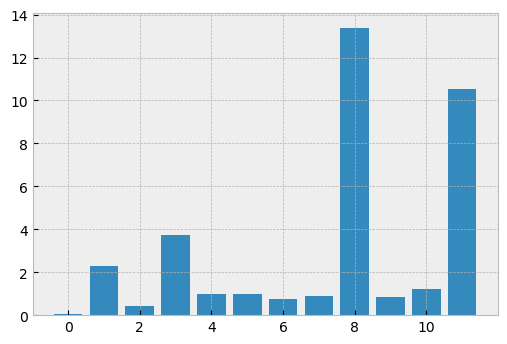

In [132]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### we see that features 3,8,11 are most important ['speechiness','duration_ms','mode']

### 2-Mutual Information

Feature 0: 0.033873
Feature 1: 0.001748
Feature 2: 0.139588
Feature 3: 0.155914
Feature 4: 0.000000
Feature 5: 0.084832
Feature 6: 0.000000
Feature 7: 0.034170
Feature 8: 0.274844
Feature 9: 0.061688
Feature 10: 0.004978
Feature 11: 0.116245


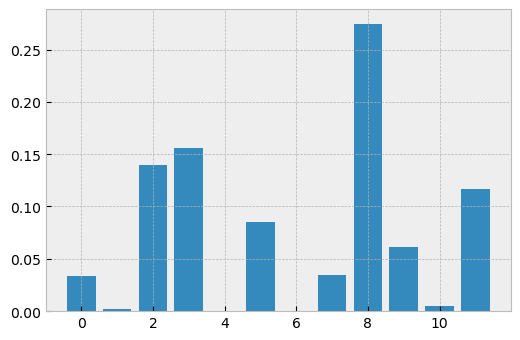

In [133]:
fs2 = SelectKBest(score_func=mutual_info_classif, k='all')
fs2.fit(X, y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs2.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.show()

### features 2,3 and 8 are most important ['tempo', 'speechiness','duration_ms']

In [151]:
XC=X[['speechiness','duration_ms','mode']]
Xm=X[['tempo', 'speechiness','duration_ms']]

In [152]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(XC, y, test_size=0.1, random_state=42,stratify=y)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, y, test_size=0.1, random_state=45,stratify=y)

## We'll start with KNN classifier and use Random search to find best hyperpatamaters

In [136]:
def knn_random_fit(X_train,y_train):  
    ks_param={'n_neighbors':randint(1,15),'p' : randint(1,3) , 'leaf_size' : randint(10,60)},
    knn=KNeighborsClassifier()
    random_searchknn=RandomizedSearchCV(knn,ks_param,random_state=42)
    best_model_knn = random_searchknn.fit(X_train, y_train)
    print(best_model_knn.best_estimator_)

In [137]:
def train_knn(leaf_size,n,p,X_train,y_train,X_test,y_test):
    knn=KNeighborsClassifier(leaf_size=leaf_size,n_neighbors=n,p=p)
    print('fitting the model to training data')
    knn.fit(X_train,y_train)
    print('done training')
    print('fitting model to test data')
    yhat=knn.predict(X_test)
    print('calculating accuracy')
    acc=metrics.accuracy_score(y_test, yhat)
    print('Accuracy of model = {} %'.format(acc*100))
    return knn,yhat

In [138]:
labels=['pop','rock','country']

### best hyperparameters for chi 2 features

In [153]:
knn_random_fit(Xc_train,yc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=28, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')


In [154]:
knnc,yhatknnc=train_knn(28,8,1,Xc_train,yc_train,Xc_test,yc_test)

fitting the model to training data
done training
fitting model to test data
calculating accuracy
Accuracy of model = 82.5 %


In [155]:
print(classification_report(yc_test, yhatknnc))

              precision    recall  f1-score   support

           2       0.90      0.95      0.93        20
           3       0.69      0.90      0.78        10
           4       0.83      0.50      0.62        10

    accuracy                           0.82        40
   macro avg       0.81      0.78      0.78        40
weighted avg       0.83      0.82      0.82        40



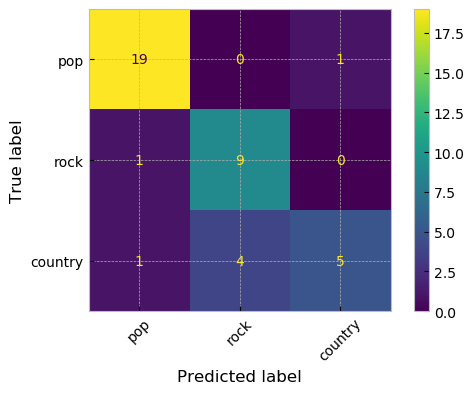

In [156]:
plot_confusion_matrix(knnc, Xc_test, yc_test, display_labels=labels,xticks_rotation=45)

### best hyperparameters for mutual information features

In [157]:
knn_random_fit(Xm_train,ym_train)

KNeighborsClassifier(algorithm='auto', leaf_size=28, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')


In [158]:
knnm,yhatknnm=train_knn(28,7,1,Xm_train,ym_train,Xm_test,ym_test)

fitting the model to training data
done training
fitting model to test data
calculating accuracy
Accuracy of model = 77.5 %


In [159]:
print(classification_report(ym_test, yhatknnm))

              precision    recall  f1-score   support

           2       0.81      0.85      0.83        20
           3       0.64      0.70      0.67        10
           4       0.88      0.70      0.78        10

    accuracy                           0.78        40
   macro avg       0.77      0.75      0.76        40
weighted avg       0.78      0.78      0.78        40



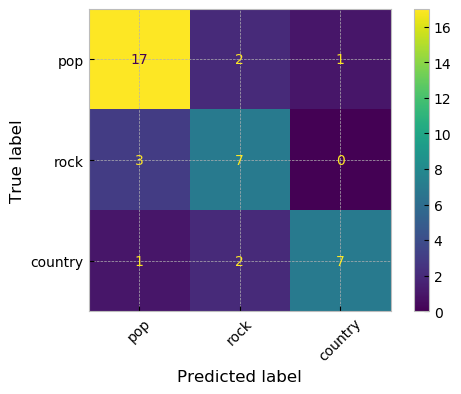

In [160]:
plot_confusion_matrix(knnm, Xm_test, ym_test, display_labels=labels,xticks_rotation=45)

## Gradient Tree Boosting

In [48]:
def train_gbc(X_train,y_train,X_test,y_test):
    gbc= GradientBoostingClassifier() 
    print('fitting the model to training data')
    gbc.fit(X_train,y_train)
    print('done training')
    print('fitting model to test data')
    yhat=gbc.predict(X_test)
    print('calculating accuracy')
    acc=metrics.accuracy_score(y_test, yhat)
    print('Accuracy of model = {} %'.format(acc*100))
    return gbc,yhat

### Here I'll use the default parameters

### Chi2 selected features

In [161]:
gbcc,yhatgbcc=train_gbc(Xc_train,yc_train,Xc_test,yc_test)

fitting the model to training data
done training
fitting model to test data
calculating accuracy
Accuracy of model = 77.5 %


In [50]:
print(classification_report(yc_test, yhatgbcc))

              precision    recall  f1-score   support

           2       0.85      0.85      0.85        20
           3       0.62      0.80      0.70        10
           4       0.86      0.60      0.71        10

    accuracy                           0.78        40
   macro avg       0.77      0.75      0.75        40
weighted avg       0.79      0.78      0.78        40



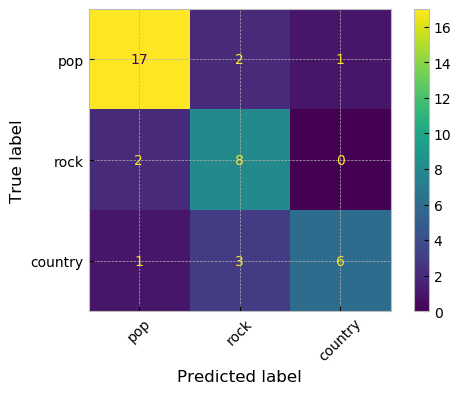

In [162]:
plot_confusion_matrix(gbcc, Xc_test, yc_test, display_labels=labels,xticks_rotation=45)

### Mutual Information selected Features

In [52]:
gbcm,yhatgbcm=train_gbc(Xm_train,ym_train,Xm_test,ym_test)

fitting the model to training data
done training
fitting model to test data
calculating accuracy
Accuracy of model = 70.0 %


In [53]:
print(classification_report(ym_test, yhatgbcm))

              precision    recall  f1-score   support

           2       0.75      0.75      0.75        20
           3       0.44      0.40      0.42        10
           4       0.82      0.90      0.86        10

    accuracy                           0.70        40
   macro avg       0.67      0.68      0.68        40
weighted avg       0.69      0.70      0.69        40



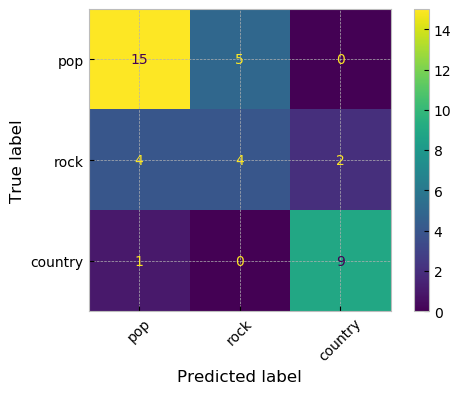

In [54]:
plot_confusion_matrix(gbcm, Xm_test, ym_test, display_labels=labels,xticks_rotation=45)

In [117]:
def train_nn(X_train,y_train,X_test,y_test):
    print('fitting the model to training data')
    clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
    print('done training')
    print('fitting model to test data')
    yhat=clf.predict(X_test)    
    print('calculating accuracy')
    acc=metrics.accuracy_score(y_test, yhat)
    print('Accuracy of model = {} %'.format(acc*100))
    return clf,yhat

### chi2 Information selected Features

In [118]:
nnc,yhatnnc=train_nn(Xc_train,yc_train,Xc_test,yc_test)

fitting the model to training data
done training
fitting model to test data
calculating accuracy
Accuracy of model = 82.5 %


In [120]:
print(classification_report(yc_test, yhatnnc))

              precision    recall  f1-score   support

           2       0.90      0.90      0.90        20
           3       0.69      0.90      0.78        10
           4       0.86      0.60      0.71        10

    accuracy                           0.82        40
   macro avg       0.82      0.80      0.80        40
weighted avg       0.84      0.82      0.82        40



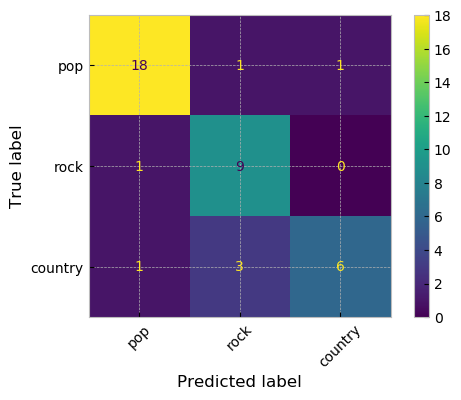

In [121]:
plot_confusion_matrix(nnc, Xc_test, yc_test, display_labels=labels,xticks_rotation=45)

### Mutual Information selected Features

In [122]:
nnm,yhatnnm=train_nn(Xm_train,ym_train,Xm_test,ym_test)

fitting the model to training data
done training
fitting model to test data
calculating accuracy
Accuracy of model = 75.0 %


In [123]:
print(classification_report(ym_test, yhatnnm))

              precision    recall  f1-score   support

           2       0.84      0.80      0.82        20
           3       0.55      0.60      0.57        10
           4       0.80      0.80      0.80        10

    accuracy                           0.75        40
   macro avg       0.73      0.73      0.73        40
weighted avg       0.76      0.75      0.75        40



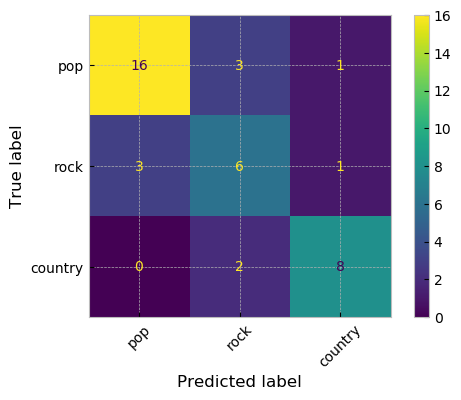

In [124]:
plot_confusion_matrix(nnm, Xm_test, ym_test, display_labels=labels,xticks_rotation=45)

## conclusions...
### 1- Neural Network and KNN classifier worked best with 'Rock' genre while KNN was best with 'pop' and GBC using mutual information was best with 'Country genre'
### 2- I should consider collecting more data and see if the model performs better